In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model

# reflect the tables
Base = automap_base()
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measures = Base.classes.measurement
stations = Base.classes.station

In [23]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [39]:
# Find the most recent date in the data set.
latest = session.query(measures.date).order_by(measures.date.desc()).first()
print(latest)

('2017-08-23',)


<BarContainer object of 2223 artists>

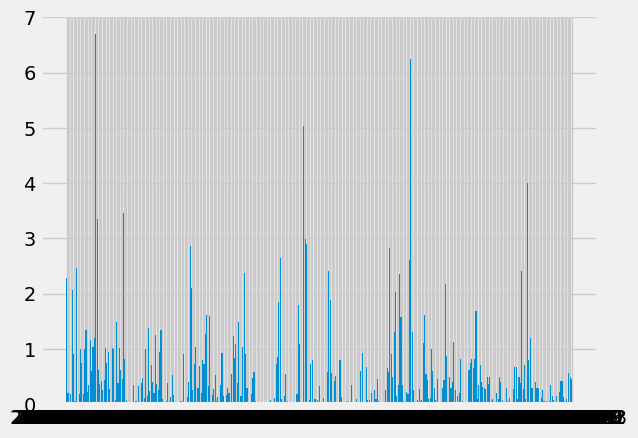

In [83]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_earlier = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precip = session.query(measures.prcp).\
    filter(measures.date > year_earlier).all()
precip = [row.prcp for row in precip] 

dates = session.query(measures.date).\
    filter(measures.date > year_earlier).all()
dates = [row.date for row in dates]
# Save the query results as a Pandas DataFrame. Explicitly set the column names
weather_df = pd.DataFrame({
    'Date' : dates,
    'Precipitation' : precip
    })
# Sort the dataframe by date
weather_df = weather_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(weather_df['Date'], weather_df['Precipitation'])

In [82]:
weather_df

,Date,Precipitation
0,2010-01-01,0.08
9007,2010-01-01,0.21
9518,2010-01-01,0.15
12187,2010-01-01,0.15
14959,2010-01-01,0.05
...,...,...
19548,2017-08-22,0.50
2723,2017-08-23,0.00
7634,2017-08-23,0.00
12186,2017-08-23,0.08


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

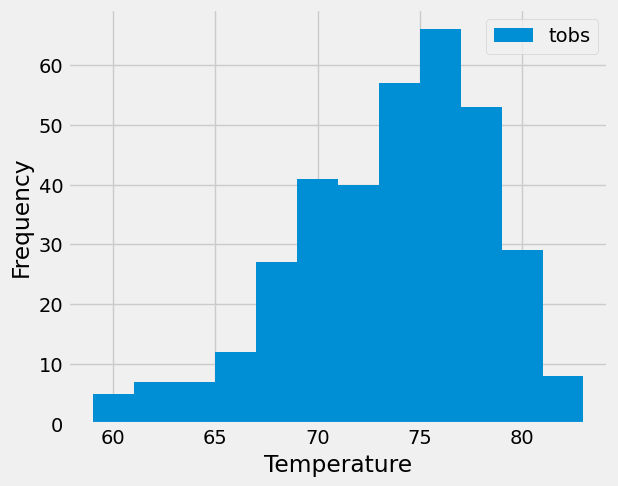

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()